# Part-1 Data Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import load_model

d:\product\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model_File_Path = '100_Neuron_RNN_Model.h5'

# Import Dataset

In [3]:
train_Dataset_File_Path = r'Google_Stock_Price_Train.csv'
dataset_train = pd.read_csv(train_Dataset_File_Path)

training_set = dataset_train.iloc[:,1:2].values

# Feature Scaling
Normalisation

In [4]:
sc = MinMaxScaler(feature_range = (0,1))

training_set_Scaled = sc.fit_transform(training_set)

print (len(training_set_Scaled))

1258


# Creating a data structure with 60 timesteps and 1 output

In [5]:
time_Step = 60

X_train = []
y_train = []

for i in range (time_Step, len(training_set_Scaled)):
    X_train.append(training_set_Scaled[i-time_Step: i, 0])
    y_train.append(training_set_Scaled[i,0])


X_train = np.array(X_train)
y_train = np.array(y_train)
    
# print (X_train)
# print (y_train)

# Reshaping


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part-2 Building RNN

In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [113]:
regressor = Sequential()

In [114]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True, ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True, ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True, ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100 ))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [115]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Training 

In [116]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0646
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0070
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 4/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0043
Epoch 5/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0043
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0039
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0035
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0035
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0033
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0035
Epoch 12/100
1198/1198 [==============================] - 8s 7ms/step - l

In [117]:
regressor.save(model_File_Path)

In [7]:
regressor = load_model(model_File_Path)

# Making Predicitions

In [8]:
test_Dataset_File_Path = r'Google_Stock_Price_Test.csv'
dataset_test = pd.read_csv(test_Dataset_File_Path)
real_stock_price = dataset_test.iloc[:,1:2].values

In [9]:
dataset_total = pd.concat( (dataset_train['Open'], dataset_test['Open']), axis = 0 )
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 : ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [10]:
X_test = []

for i in range (time_Step, 80):
    X_test.append(inputs[i-time_Step: i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1) )

print(len(X_test))

20


In [11]:
predicted_Stock_Price = regressor.predict(X_test)
predicted_Stock_Price = sc.inverse_transform(predicted_Stock_Price)

# Visualising Result

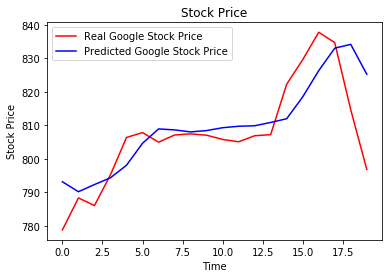

In [12]:
plt.plot(real_stock_price , color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_Stock_Price , color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()